In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("timesData.csv")

df.sample(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
369,169,Paris Diderot University – Paris 7,France,23.3,70.7,18.7,88.9,-,45.0,"27,756",14.8,17%,63 : 37,2012
1196,194,University of Reading,United Kingdom,36.0,70.6,34.1,58.7,34.4,44.8,"12,050",14.8,28%,55 : 45,2014
812,201-225,Queen’s University,Canada,39.5,58.0,35.4,51.2,77.3,-,"20,488",22.1,10%,58 : 42,2013
1154,153,University of Birmingham,United Kingdom,42.8,72.2,39.6,57.5,36.7,48.3,"25,295",16.4,23%,54 : 46,2014
1321,301-350,Murdoch University,Australia,16.7,86.4,16.0,51.7,49.9,-,"16,606",32.8,43%,59 : 41,2014
2345,501-600,University of La Laguna,Spain,16.9,44.7,10.0,44.8,28.5,-,"22,422",14.9,5%,58 : 42,2016
280,81,"Rutgers, the State University of New Jersey",United States of America,51.6,25.3,60.0,69.0,-,56.8,"37,032",17.3,8%,51 : 49,2012
765,164,Université Catholique de Louvain,Belgium,38.6,64.3,40.5,68.8,34.5,50.0,"28,856",42.0,19%,54 : 46,2013
1151,150,Tohoku University,Japan,51.8,29.3,48.1,47.3,85.9,48.5,"17,200",5.0,7%,25 : 75,2014


In [146]:
print("Dataset shape:")
print(df.shape)
print("Dataset info:")
print(df.info())

Dataset shape:
(2603, 14)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtype

In [147]:
# Check null values, no null values in this dataset
df.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [148]:
nan_df = df.isna()
print(nan_df)

      world_rank  university_name  country  teaching  international  research  \
0          False            False    False     False          False     False   
1          False            False    False     False          False     False   
2          False            False    False     False          False     False   
3          False            False    False     False          False     False   
4          False            False    False     False          False     False   
...          ...              ...      ...       ...            ...       ...   
2598       False            False    False     False          False     False   
2599       False            False    False     False          False     False   
2600       False            False    False     False          False     False   
2601       False            False    False     False          False     False   
2602       False            False    False     False          False     False   

      citations  income  to

In [149]:
nan_rows = df.isna().any(axis=1)
print(nan_rows)

0        True
1       False
2       False
3       False
4       False
        ...  
2598    False
2599    False
2600     True
2601    False
2602    False
Length: 2603, dtype: bool


In [150]:
# Replace "-" with NaN
df.replace('-', pd.NA, inplace=True)

# Convert columns to numeric
df = df.apply(pd.to_numeric, errors='ignore')

# Drop rows with NaN values
df.dropna(inplace=True)

C:\Users\ilyar\AppData\Local\Temp\ipykernel_24480\3367642713.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [151]:
def get_average_rank(rank_distribution: str) -> int:
    if '-' in rank_distribution:
        min_rank, max_rank = rank_distribution.split('-')
        return round((int(min_rank) + int(max_rank)) / 2)
    if rank_distribution.startswith("="):
        return int(rank_distribution.replace('=', ''))
    return int(rank_distribution)

df['levered_rank'] = df['world_rank'].apply(get_average_rank)

In [152]:
def str_to_int(x):
    if isinstance(x, str):
        x = x.replace(',', '')  # Remove commas
        if x.isdigit():  # Check if it's a valid integer
            return int(x)
    return x

# Apply the function to the DataFrame
df['num_students'] = df['num_students'].apply(str_to_int)

In [153]:
def from_percent(x):
    if '%' in x:
        x = x.replace('%', '')
    return int(x)

# Apply the function to the DataFrame
df['international_students'] = df['international_students'].apply(from_percent)

In [154]:
def get_ratio(x):
    a, b = x.split(":")
    return int(a) / int(b)

# Apply the function to the DataFrame
df['female_male_ratio'] = df['female_male_ratio'].apply(get_ratio)

In [155]:
df.sample(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,levered_rank
1061,60,Pohang University of Science and Technology,South Korea,54.2,33.8,49.0,85.7,100.0,61.7,3055,10.1,4,0.250000,2014,60
1944,141,University of Massachusetts,United States of America,40.2,48.9,36.3,88.1,52.2,54.3,56959,13.0,11,0.960784,2016,141
1532,131,Lancaster University,United Kingdom,35.4,84.7,36.1,78.0,34.1,52.0,11512,14.9,33,1.083333,2015,131
152,152,Newcastle University,United Kingdom,42.7,80.5,42.8,63.6,31.1,51.2,20174,15.2,29,1.000000,2011,152
1556,155,National Taiwan University,Taiwan,48.8,27.5,57.3,47.7,43.8,49.3,31891,11.9,7,0.639344,2015,155
1149,148,"University of California, Riverside",United States of America,25.9,62.2,25.8,91.8,37.6,48.7,20626,22.0,12,1.040816,2014,148
256,57,Ohio State University,United States of America,61.8,42.2,56.2,77.5,49.9,63.0,51462,13.4,12,0.960784,2012,57
274,75,Emory University,United States of America,48.4,37.3,39.8,90.9,34.4,57.4,12338,4.5,18,1.272727,2012,75
1926,=123,University of Erlangen-Nuremberg,Germany,51.7,47.0,39.7,75.2,99.4,56.0,36146,53.9,9,0.960784,2016,123
1836,34,University of British Columbia,Canada,60.2,90.5,73.2,91.5,42.6,75.3,50152,17.6,25,1.173913,2016,34


In [156]:
df.drop('world_rank', axis=1, inplace=True)
df.sample(10)

,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,levered_rank
663,University of Sydney,Australia,59.5,83.0,70.1,62.9,69.2,65.7,41868,20.2,28,1.325581,2013,62
243,New York University,United States of America,60.2,38.1,65.4,92.3,30.9,69.0,42056,6.8,19,1.222222,2012,44
304,University of Montreal,Canada,54.5,79.5,47.0,48.7,81.3,53.1,38264,20.3,25,1.325581,2012,104
1450,Tsinghua University,China,64.1,44.6,68.3,65.0,99.7,65.1,39763,13.7,10,0.470588,2015,49
1550,University of Birmingham,United Kingdom,42.8,75.8,39.8,62.7,36.0,50.2,25295,16.4,23,1.173913,2015,148
1408,Princeton University,United States of America,86.6,61.2,94.7,99.6,82.7,90.9,7929,8.4,27,0.818182,2015,7
725,Chinese University of Hong Kong,Hong Kong,53.7,62.6,63.1,45.1,44.5,54.4,17916,10.2,22,1.127660,2013,124
699,University of Arizona,United States of America,47.0,31.3,53.7,76.9,83.9,57.7,36429,12.7,8,1.083333,2013,98
1172,University of Vienna,Austria,35.8,89.5,36.1,57.4,29.3,46.2,34651,20.5,25,2.030303,2014,170
1093,McMaster University,Canada,35.3,68.0,42.7,79.4,86.9,54.5,23823,19.3,15,1.127660,2014,92


<Axes: >

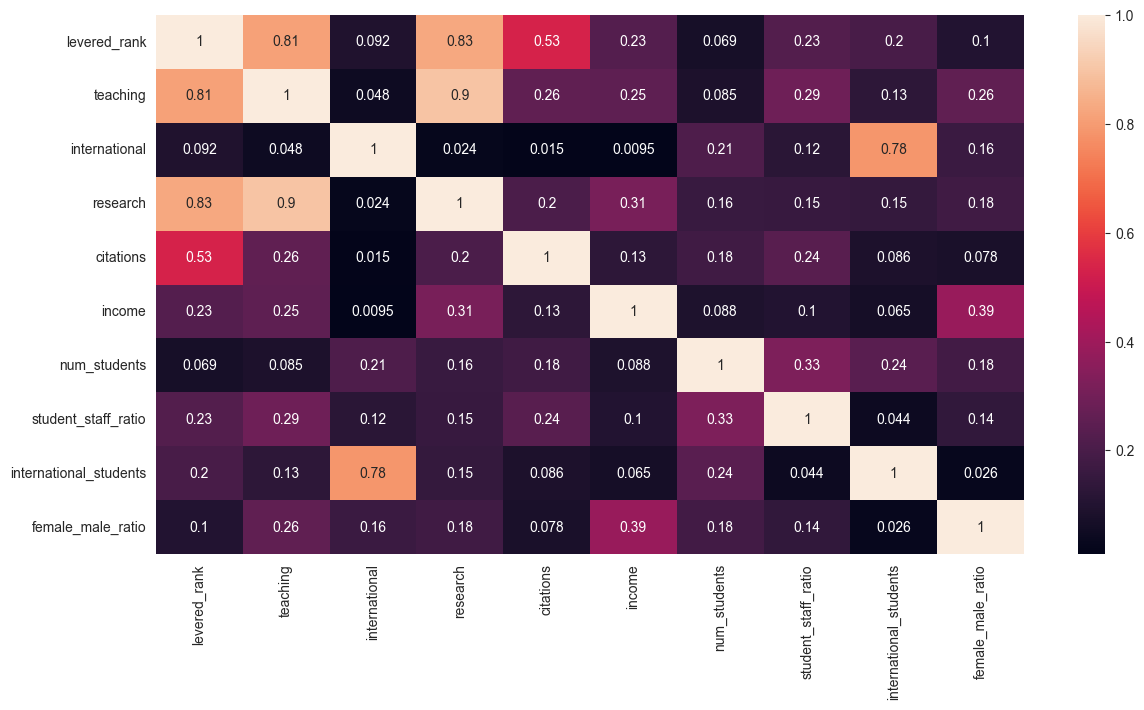

In [157]:
selected_series = ['levered_rank', 'teaching', 'international', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio']

plt.figure(figsize=(14,7))
corr = df[selected_series].corr().abs()
sns.heatmap(corr, annot=True)

From numeric numbers we see, that the most correlation for ranking is with teaching fields and research fields

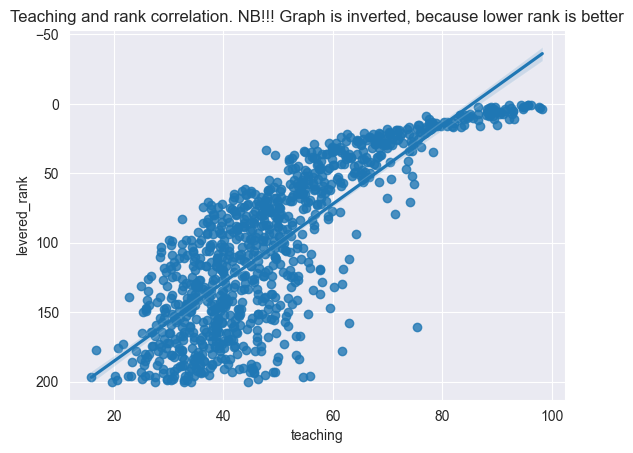

In [158]:
sns.regplot(x='teaching', y='levered_rank', data=df, fit_reg=True)
plt.gca().invert_yaxis()
plt.title('Teaching and rank correlation. NB!!! Graph is inverted, because lower rank is better')
plt.show()

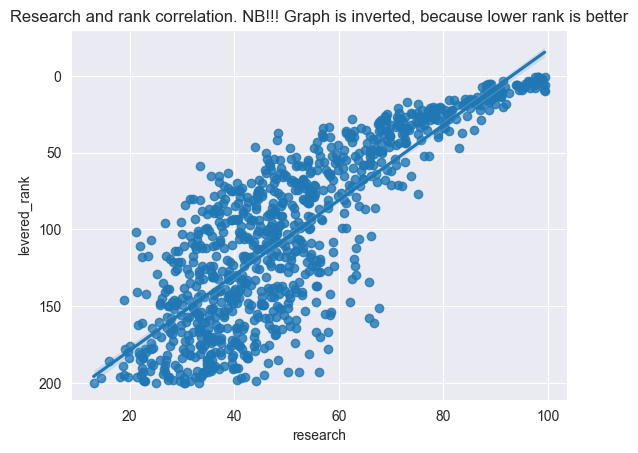

In [159]:
sns.regplot(x='research', y='levered_rank', data=df, fit_reg=True)
plt.gca().invert_yaxis()
plt.title('Research and rank correlation. NB!!! Graph is inverted, because lower rank is better')
plt.show()

We see that both teaching and research fields highly correlate with ranking

In [160]:
# Some basic description
print("Dataset description:")
df.describe()

Dataset description:


,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,levered_rank
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,49.379665,61.490356,51.315304,77.364885,54.764256,59.444864,23415.132075,15.980503,20.457023,1.047649,2013.663522,102.215933
std,16.478155,20.715291,19.374551,15.437413,22.870463,12.654890,13334.646441,8.617473,10.526374,0.357997,1.674132,57.325121
min,15.900000,15.900000,13.100000,8.600000,24.200000,41.400000,462.000000,3.600000,1.000000,0.149425,2011.000000,1.000000
25%,37.500000,46.300000,36.300000,67.200000,36.900000,50.200000,13946.500000,10.700000,12.000000,0.895864,2012.000000,55.000000
50%,46.200000,61.600000,47.650000,79.400000,46.600000,55.450000,21424.000000,14.900000,19.000000,1.083333,2014.000000,103.000000
75%,57.875000,79.575000,63.350000,89.600000,69.075000,65.700000,30822.000000,18.800000,27.000000,1.272727,2015.000000,151.000000
max,98.300000,100.000000,99.400000,100.000000,100.000000,96.000000,127431.000000,85.800000,54.000000,2.333333,2016.000000,200.000000


In [161]:
random_universities = df.sample(50)
america_universities = df[df['country'] == 'United States of America'].sample(50)

In [162]:
random_universities.describe()

,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,levered_rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,46.718000,60.784000,51.296000,76.068000,56.264000,58.230000,20723.080000,16.656000,20.74000,1.040165,2013.660000,106.240000
std,15.027861,20.126096,17.803565,15.442301,23.269019,10.966633,11603.001154,7.850807,10.07079,0.378042,1.721532,53.938196
min,22.700000,24.700000,24.300000,32.900000,29.100000,45.900000,5287.000000,5.800000,5.00000,0.149425,2011.000000,5.000000
25%,35.200000,47.475000,36.075000,66.275000,38.725000,50.025000,11717.500000,11.925000,12.25000,0.895864,2012.000000,65.000000
50%,45.400000,60.900000,51.350000,78.150000,43.150000,55.200000,20230.500000,15.900000,19.00000,1.105496,2014.000000,105.500000
75%,56.425000,76.975000,61.750000,86.725000,69.075000,64.025000,26480.500000,18.675000,28.00000,1.222222,2015.000000,151.500000
max,91.500000,93.800000,99.100000,100.000000,100.000000,92.900000,50882.000000,41.900000,38.00000,2.333333,2016.000000,200.000000


In [163]:
america_universities.describe()

,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,levered_rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,53.140000,44.108000,52.720000,86.038000,50.084000,62.21400,23871.540000,11.816000,15.240000,1.029412,2013.580000,92.980000
std,18.067346,13.880787,23.481282,13.465419,20.688806,14.64384,15256.643723,5.991196,6.557625,0.166175,1.513072,62.987038
min,25.300000,17.200000,21.600000,49.300000,27.400000,45.70000,5495.000000,3.600000,5.000000,0.639344,2011.000000,5.000000
25%,40.800000,34.225000,36.000000,81.200000,35.900000,49.77500,12557.500000,8.400000,10.000000,0.923077,2012.250000,29.000000
50%,49.400000,43.500000,47.300000,90.450000,41.350000,58.70000,21068.500000,10.250000,14.500000,1.040816,2014.000000,83.500000
75%,64.300000,55.550000,72.375000,95.900000,54.600000,74.75000,30996.000000,15.900000,19.000000,1.116578,2014.750000,156.000000
max,93.200000,67.700000,99.400000,100.000000,100.000000,92.90000,83236.000000,29.900000,35.000000,1.380952,2016.000000,190.000000


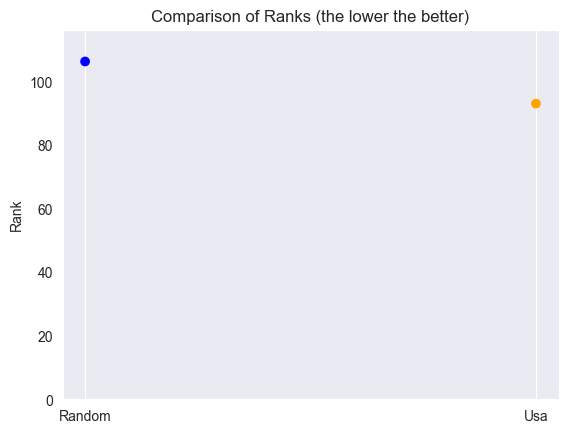

In [164]:
avg_random = random_universities['levered_rank'].mean()
avg_usa = america_universities['levered_rank'].mean()

ymax = max(avg_random, avg_usa) + 10

# Plotting
plt.scatter(['Random', 'Usa'], [avg_random, avg_usa], color=['blue', 'orange'])
plt.ylim(0, ymax)
plt.title('Comparison of Ranks (the lower the better)')
plt.ylabel('Rank')
plt.grid(axis='y')
plt.show()

This shows that USA universities generally have higher rank.
Ran multiple times and always received a same result.

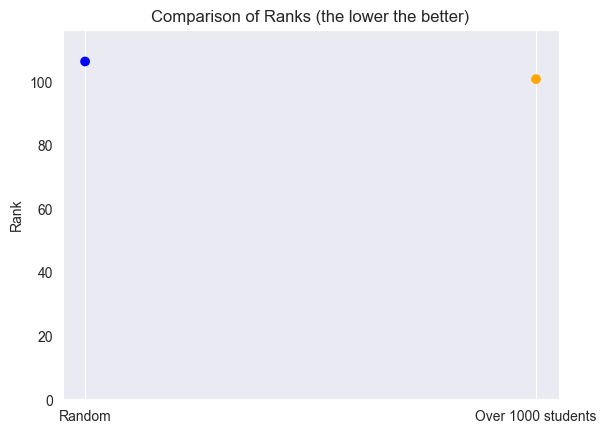

In [167]:
big_universities = df[df['num_students'] > 5000].sample(50)

avg_international = big_universities['levered_rank'].mean()

ymax = max(avg_random, avg_international) + 10

# Plotting
plt.scatter(['Random', 'Over 1000 students'], [avg_random, avg_international], color=['blue', 'orange'])
plt.ylim(0, ymax)
plt.title('Comparison of Ranks (the lower the better)')
plt.ylabel('Rank')
plt.grid(axis='y')
plt.show()

This shows that size of university does not matter very much.
Ran multiple times and always received a same result.